# HW3

## Programming Question

###  (a) Data Pre-processing

1. Given a csv file named "data_train-2.csv". I need to read the data using the pandas library using read_csv function.2. 
After reading the data, I need to print the first five rows. I used head() method which by default, returns the first five rows if parameter is not specifie.d3. 
I checked for missing values and returned the null values. To do this I used isnull method. The isnull method provides dataframe objects that have all NULLs substituted with true and non-NULLs substituted with false. The sum method returns the sum of each column containing NU4.
. After the above step, I removed the rows where there are missing values using dropna mod.
5. Next I extracted the attributes or features from dataframe
6. Next I extracted the target. After this, I found the median and updated the target with 1 or 0 based on the value greater than median or not.
7. After this I have used train_test_split, to split the data for training(80%) and validation(20%).eth

In [2]:
import numpy as np
import pandas as pd
import pickle
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

data = pd.read_csv('data_train-2.csv')
print(data.head()); #by default head method returns the first five rows if a number is not mentioned

print(data.shape)

null_data = data.isnull().sum(); #isnull method returns the dataframe objects where all NULL is replaced with true and non NULL is replaced with false.
#The sum method returns the sum of each column containing NULL.
print(null_data)

data = data.dropna() #drop the rows where there are missing values

# Extract the attributes. Copy the mentioned columns from the 'data' to x. The copy() method returns a copy of the DataFrame
x = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 
          'Research']].copy()
# Extract the target. Copy the mentioned columns from the 'data' to y. The copy() method returns a copy of the DataFrame
y = data[['Chance of Admit ']].copy()

median = np.median(y) #find the median

print('Median of Chance of Admit: ', median)

y['Chance of Admit '] = y['Chance of Admit '].apply(lambda x: 1 if x > median else 0);

# split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.2, random_state=1234)


   Unnamed: 0  Serial No.  GRE Score  TOEFL Score  University Rating  SOP  \
0           0         109        331          116                  5  5.0   
1           1         346        316           98                  1  1.5   
2           2          99        332          119                  4  5.0   
3           3         210        301          104                  3  3.5   
4           4         242        317          103                  2  2.5   

   LOR   CGPA  Research  Chance of Admit   
0   5.0  9.38         1              0.93  
1   2.0  7.43         0              0.49  
2   4.5  9.24         1              0.90  
3   4.0  8.12         1              0.68  
4   2.0  8.15         0              0.65  
(320, 10)
Unnamed: 0           0
Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64
Median of Chance of 

### (b) Model Initialization
### (c) Feature Selection and Model Training
### (e) Result Visualization

1. First I intialised three models with three different kernels(linear, rbf and polynomial of degree 3).
2. Second, I have taken the training data from X_train with the feature combinations. (['CGPA', 'SOP'], ['CGPA', 'GRE Score'], ['SOP', 'LOR '], ['LOR ', 'GRE Score']).
3. Fit the model with the training data.
5. Predict the Results and Compute the accuracy.

In [18]:
import matplotlib.pyplot as plt
#function for plotting the results for result visualisation. (reference:textbook-svm-lab(supplementary))
def plot_svc(svc, X, y, ax, Label, Title, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    predictions  = svc.predict(X) #prediction of test data
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2) #plot decision boundary
    ax.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired,  edgecolors='k', label='Data Points') #plot the points
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xlabel(Label[0])
    ax.set_ylabel(Label[1])
    ax.set_title(Title)
    return predictions

Below, I have intialised the model, trained the model each time with the mentiond combination and have drawn the plots of the results by calling above plot_svc function

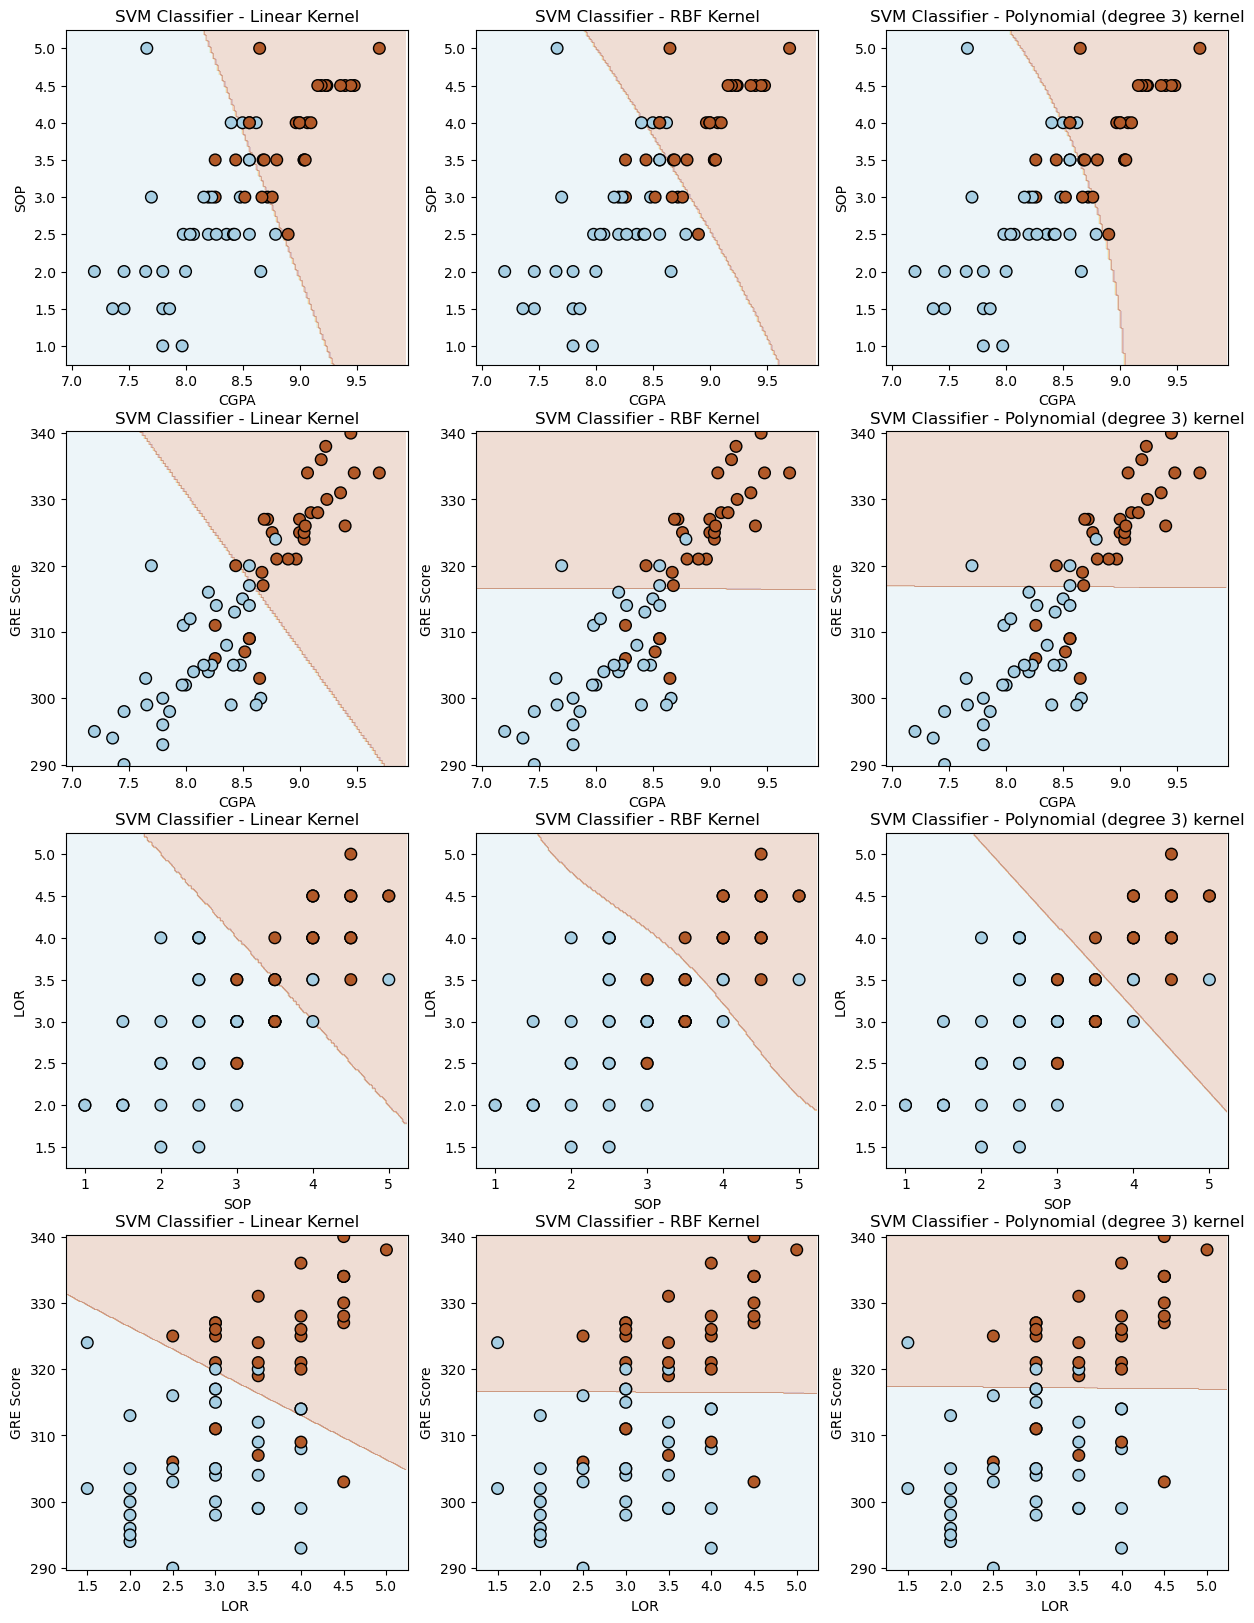

In [21]:
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.ravel()

# Create SVM classifiers with different kernels
LinearKernel_h = SVC(kernel='linear')
RBFkernel_h = SVC(kernel='rbf')
PolyKernel_h = SVC(kernel='poly', degree = 3)

#  1. CGPA and SOP
x1 = X_train[['CGPA', 'SOP']].to_numpy()
y1 = y_train.copy()
x2 = X_test[['CGPA', 'SOP']].to_numpy()
y2 = y_test.copy()
Xlabel = ['CGPA', 'SOP'];
LinKernel_clf1  = LinearKernel_h.fit(x1, y1);
RBFkernel_clf1 = RBFkernel_h.fit(x1, y1);
PolyKernel_clf1 = PolyKernel_h.fit(x1, y1);
SV_LinKernel_clf1 = LinKernel_clf1.support_vectors_
SV_RBFkernel_clf1 = RBFkernel_clf1.support_vectors_
SV_PolyKernel_clf1 = PolyKernel_clf1.support_vectors_
LinKernel_clf1_pred = plot_svc(LinearKernel_h, x2, y2, axes[0], Xlabel, 'SVM Classifier - Linear Kernel');
RBFkernel_clf1_pred = plot_svc(RBFkernel_h, x2, y2, axes[1], Xlabel, 'SVM Classifier - RBF Kernel');
PolyKernel_clf1_pred = plot_svc(PolyKernel_h, x2, y2, axes[2], Xlabel, 'SVM Classifier - Polynomial (degree 3) kernel');


# 2. CGPA and GRE Score
x1 = X_train[['CGPA', 'GRE Score']].to_numpy()
x2 = X_test[['CGPA', 'GRE Score']].to_numpy()
Xlabel = ['CGPA', 'GRE Score'];
LinKernel_clf2  = LinearKernel_h.fit(x1, y1);
RBFkernel_clf2 = RBFkernel_h.fit(x1, y1);
PolyKernel_clf2 = PolyKernel_h.fit(x1, y1);
SV_LinKernel_clf2 = LinKernel_clf2.support_vectors_
SV_RBFkernel_clf2 = RBFkernel_clf2.support_vectors_
SV_PolyKernel_clf2 = PolyKernel_clf2.support_vectors_
LinKernel_clf2_pred = plot_svc(LinearKernel_h, x2, y2, axes[3], Xlabel, 'SVM Classifier - Linear Kernel');
RBFkernel_clf2_pred = plot_svc(RBFkernel_h, x2, y2, axes[4], Xlabel, 'SVM Classifier - RBF Kernel');
PolyKernel_clf2_pred = plot_svc(PolyKernel_h, x2, y2, axes[5], Xlabel, 'SVM Classifier - Polynomial (degree 3) kernel');

# 3. SOP and LOR
x1 = X_train[['SOP', 'LOR ']].to_numpy()
x2 = X_test[['SOP', 'LOR ']].to_numpy()
Xlabel = ['SOP', 'LOR '];
LinKernel_clf3  = LinearKernel_h.fit(x1, y1);
RBFkernel_clf3 = RBFkernel_h.fit(x1, y1);
PolyKernel_clf3 = PolyKernel_h.fit(x1, y1);
SV_LinKernel_clf3 = LinKernel_clf3.support_vectors_
SV_RBFkernel_clf3 = RBFkernel_clf3.support_vectors_
SV_PolyKernel_clf3 = PolyKernel_clf3.support_vectors_
LinKernel_clf3_pred = LinKernel_clf3_pred = plot_svc(LinearKernel_h, x2, y2, axes[6], Xlabel, 'SVM Classifier - Linear Kernel');
RBFkernel_clf3_pred = plot_svc(RBFkernel_h, x2, y2, axes[7], Xlabel, 'SVM Classifier - RBF Kernel');
PolyKernel_clf3_pred = plot_svc(PolyKernel_h, x2, y2, axes[8], Xlabel, 'SVM Classifier - Polynomial (degree 3) kernel');

# 4. LOR and GRE Score
x1 = X_train[['LOR ', 'GRE Score']].to_numpy()
x2 = X_test[['LOR ', 'GRE Score']].to_numpy()
Xlabel = ['LOR ', 'GRE Score'];
LinKernel_clf4  = LinearKernel_h.fit(x1, y1);
RBFkernel_clf4 = RBFkernel_h.fit(x1, y1);
PolyKernel_clf4 = PolyKernel_h.fit(x1, y1);
SV_LinKernel_clf4 = LinKernel_clf4.support_vectors_
SV_RBFkernel_clf4 = RBFkernel_clf4.support_vectors_
SV_PolyKernel_clf4 = PolyKernel_clf4.support_vectors_
LinKernel_clf4_pred = plot_svc(LinearKernel_h, x2, y2, axes[9], Xlabel, 'SVM Classifier - Linear Kernel');
RBFkernel_clf4_pred = plot_svc(RBFkernel_h, x2, y2, axes[10], Xlabel, 'SVM Classifier - RBF Kernel');
PolyKernel_clf4_pred = plot_svc(PolyKernel_h, x2, y2, axes[11], Xlabel, 'SVM Classifier - Polynomial (degree 3) kernel');



From the above plots, it looks like the model whose kernel is RBF kernel and feature combination is LOR and SOP is good model because the distance of decision boundary is comparitively from the both class points. But we can't conclude based on this becuase, It is not very much clear how good it has done the classification because there might overlapping of the points. To Give conclusion of the best model, we need to calculate the accuracy and find the model which has highest accuracy.

### (d) Support Vectors: 

In [26]:
print('No of Support Vectors:')
print('Linear kernel Classifier-1 ', SV_LinKernel_clf1.shape[0])
print('Linear kernel Classifier-2 ', SV_LinKernel_clf2.shape[0])
print('Linear kernel Classifier-3 ', SV_LinKernel_clf3.shape[0])
print('Linear kernel Classifier-4 ', SV_LinKernel_clf4.shape[0])

print('RBF kernel Classifier-1 ', SV_RBFkernel_clf1.shape[0])
print('RBF kernel Classifier-2 ', SV_RBFkernel_clf2.shape[0])
print('RBF kernel Classifier-3 ', SV_RBFkernel_clf3.shape[0])
print('RBF kernel Classifier-4 ', SV_RBFkernel_clf4.shape[0])

print('Polynomial (degree 3) kernel Classifier-1 ', SV_PolyKernel_clf1.shape[0])
print('Polynomial (degree 3) kernel Classifier-2 ', SV_PolyKernel_clf2.shape[0])
print('Polynomial (degree 3) kernel Classifier-3 ', SV_PolyKernel_clf3.shape[0])
print('Polynomial (degree 3) kernel Classifier-4 ', SV_PolyKernel_clf4.shape[0])

print('Support vectors for Linear kernel Classifier-1 ', SV_LinKernel_clf1);
print('Support vectors for RBF kernel Classifier-1 ', SV_RBFkernel_clf1);
print('Support vectors for Polynomial (degree 3) kernel Classifier-1 ', SV_PolyKernel_clf1);


print('Support vectors for Linear kernel Classifier-2 ', SV_LinKernel_clf2);
print('Support vectors for RBF kernel Classifier-2 ', SV_RBFkernel_clf2);
print('Support vectors for Polynomial (degree 3) kernel Classifier-2 ', SV_PolyKernel_clf2);

print('Support vectors for Linear kernel Classifier-3 ', SV_LinKernel_clf3);
print('Support vectors for RBF kernel Classifier-3 ', SV_RBFkernel_clf3);
print('Support vectors for Polynomial (degree 3) kernel Classifier-3 ', SV_PolyKernel_clf3);

print('Support vectors for Linear kernel Classifier-4 ', SV_LinKernel_clf4);
print('Support vectors for RBF kernel Classifier-4 ', SV_RBFkernel_clf4);
print('Support vectors for Polynomial (degree 3) kernel Classifier-4 ', SV_PolyKernel_clf4);

No of Support Vectors:
Linear kernel Classifier-1  97
Linear kernel Classifier-2  93
Linear kernel Classifier-3  123
Linear kernel Classifier-4  94
RBF kernel Classifier-1  120
RBF kernel Classifier-2  224
RBF kernel Classifier-3  121
RBF kernel Classifier-4  226
Polynomial (degree 3) kernel Classifier-1  91
Polynomial (degree 3) kernel Classifier-2  132
Polynomial (degree 3) kernel Classifier-3  120
Polynomial (degree 3) kernel Classifier-4  134
Support vectors for Linear kernel Classifier-1  [[8.18 3.5 ]
 [8.53 3.5 ]
 [8.6  3.5 ]
 [8.68 2.5 ]
 [9.04 4.5 ]
 [8.45 3.  ]
 [8.73 3.  ]
 [8.3  3.5 ]
 [8.2  4.  ]
 [8.54 3.5 ]
 [8.46 3.5 ]
 [8.84 3.  ]
 [8.53 3.5 ]
 [8.54 3.  ]
 [9.22 3.5 ]
 [8.45 3.5 ]
 [8.28 3.5 ]
 [8.69 4.  ]
 [8.5  3.  ]
 [8.78 4.  ]
 [8.2  3.5 ]
 [8.64 5.  ]
 [8.73 3.  ]
 [8.49 3.  ]
 [8.67 4.  ]
 [8.25 4.  ]
 [8.76 3.5 ]
 [8.62 2.5 ]
 [8.14 4.5 ]
 [8.22 3.5 ]
 [8.1  4.  ]
 [8.5  3.5 ]
 [8.8  4.  ]
 [9.02 3.  ]
 [8.57 3.  ]
 [8.56 2.  ]
 [8.4  3.  ]
 [8.64 3.5 ]
 [9.   

In [548]:
from sklearn.metrics import accuracy_score
print('Accuracy for Linear kernel Classifier-1', accuracy_score(y_test, LinKernel_clf1_pred))
print('Accuracy for Linear kernel Classifier-2', accuracy_score(y_test, LinKernel_clf2_pred))
print('Accuracy for Linear kernel Classifier-3', accuracy_score(y_test, LinKernel_clf3_pred))
print('Accuracy for Linear kernel Classifier-4', accuracy_score(y_test, LinKernel_clf4_pred))

print('Accuracy for RBF kernel Classifier-1', accuracy_score(y_test, RBFkernel_clf1_pred))
print('Accuracy for RBF kernel Classifier-2', accuracy_score(y_test, RBFkernel_clf2_pred))
print('Accuracy for RBF kernel Classifier-3', accuracy_score(y_test, RBFkernel_clf3_pred))
print('Accuracy for RBF kernel Classifier-4', accuracy_score(y_test, RBFkernel_clf4_pred))


print('Accuracy for Polynomial (degree 3) kernel Classifier-1 ', accuracy_score(y_test, PolyKernel_clf1_pred))
print('Accuracy for Polynomial (degree 3) kernel Classifier-2 ', accuracy_score(y_test, PolyKernel_clf2_pred))
print('Accuracy for Polynomial (degree 3) kernel Classifier-3 ', accuracy_score(y_test, PolyKernel_clf3_pred))
print('Accuracy for Polynomial (degree 3) kernel Classifier-4 ', accuracy_score(y_test, PolyKernel_clf4_pred))

Accuracy for Linear kernel Classifier-1 0.859375
Accuracy for Linear kernel Classifier-2 0.875
Accuracy for Linear kernel Classifier-3 0.734375
Accuracy for Linear kernel Classifier-4 0.84375
Accuracy for RBF kernel Classifier-1 0.828125
Accuracy for RBF kernel Classifier-2 0.859375
Accuracy for RBF kernel Classifier-3 0.734375
Accuracy for RBF kernel Classifier-4 0.859375
Accuracy for Polynomial (degree 3) kernel Classifier-1  0.859375
Accuracy for Polynomial (degree 3) kernel Classifier-2  0.859375
Accuracy for Polynomial (degree 3) kernel Classifier-3  0.734375
Accuracy for Polynomial (degree 3) kernel Classifier-4  0.859375


It can be observed that the model whose kernel is Linear kernel and feature combination is GRE Score and CGPA is good model as it's accuracy is highest among of all the combinations and value is 87.5%. I am going to use this combination to get the results of test data. 

In [29]:
# Load the test data from the CSV file
TestData = pd.read_csv('data_test-2.csv')
print(TestData.shape)
# Drop rows with missing values
TestData_new = TestData.dropna()
# Extract the relevant features
Testx = TestData_new[['CGPA', 'GRE Score']].copy()
x1 = X_train[['CGPA', 'GRE Score']].to_numpy()
y1 = y_train.copy()
LinKernel_clf2  = LinearKernel_h.fit(x1, y1);
Testx_array = Testx.to_numpy()
TestDataPredictions = LinearKernel_h.predict(Testx_array)
Results = pd.DataFrame({'predictions': TestDataPredictions})
Results.to_csv('SreedharReddy_Pacharla_preds.csv', index=False)

(80, 9)
